# Problem Statement

### Construct a cross validated linear regression model that predicts the weight of a passenger vehicle

# Introduction

#### The goal is to construct a linear regression model to predict the weight of passenger vehicles. The steps taken is Data preparation, Exploratory Data Analysis(EDA) and regression model construction and evalution. The models are evaluated using K-fold cross- validation and the preferred model is selected on the basis of average R^2 scores.

# Exploratory Data Analysis

# # Data Preparation
The dataset is loaded, and relevant column names are assigned. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv("https://raw.githubusercontent.com/Pratibhabhalerao080/DAV-6150/main/M2_Data.csv",header=0)

In [3]:
Data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [4]:
# Defining the column name as per attribute information

column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
    'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
    'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
    'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
    'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [5]:
Data.columns = column_names

In [6]:
Data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [7]:
# List of columns to keep

selected_columns = ['height', 'width', 'length', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg','curb-weight']

#Creating a new data frame with selected columns only

df_selected = Data[selected_columns]


In [8]:
df_selected

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg,curb-weight
0,48.8,64.1,168.8,88.6,130,111,5000,21,2548
1,52.4,65.5,171.2,94.5,152,154,5000,19,2823
2,54.3,66.2,176.6,99.8,109,102,5500,24,2337
3,54.3,66.4,176.6,99.4,136,115,5500,18,2824
4,53.1,66.3,177.3,99.8,136,110,5500,19,2507
...,...,...,...,...,...,...,...,...,...
199,55.5,68.9,188.8,109.1,141,114,5400,23,2952
200,55.5,68.8,188.8,109.1,141,160,5300,19,3049
201,55.5,68.9,188.8,109.1,173,134,5500,18,3012
202,55.5,68.9,188.8,109.1,145,106,4800,26,3217


# # Descriptive Statistics
Descriptive statistics, including count, mean, standard deviation, and quartiles, were computed to understand the central tendencies and spread of the data.

In [9]:
# Descriptive statistics
df_selected.describe()

,height,width,length,wheel-base,engine-size,city-mpg,curb-weight
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,53.749020,65.916667,174.075000,98.806373,126.892157,25.240196,2555.602941
std,2.424901,2.146716,12.362123,5.994144,41.744569,6.551513,521.960820
min,47.800000,60.300000,141.100000,86.600000,61.000000,13.000000,1488.000000
25%,52.000000,64.075000,166.300000,94.500000,97.000000,19.000000,2145.000000
50%,54.100000,65.500000,173.200000,97.000000,119.500000,24.000000,2414.000000
75%,55.500000,66.900000,183.200000,102.400000,142.000000,30.000000,2939.250000
max,59.800000,72.300000,208.100000,120.900000,326.000000,49.000000,4066.000000


In [10]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   height       204 non-null    float64
 1   width        204 non-null    float64
 2   length       204 non-null    float64
 3   wheel-base   204 non-null    float64
 4   engine-size  204 non-null    int64  
 5   horsepower   204 non-null    object 
 6   peak-rpm     204 non-null    object 
 7   city-mpg     204 non-null    int64  
 8   curb-weight  204 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 14.5+ KB


# Handling missing value

In [26]:
print(df_selected.isnull().sum())


height         0
width          0
length         0
wheel-base     0
engine-size    0
horsepower     2
peak-rpm       2
city-mpg       0
curb-weight    0
dtype: int64


In [27]:
df_selected.dropna(subset=['horsepower','peak-rpm'], inplace=True)

C:\Users\Pratibha\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [28]:
print(df_selected.isnull().sum())


height         0
width          0
length         0
wheel-base     0
engine-size    0
horsepower     0
peak-rpm       0
city-mpg       0
curb-weight    0
dtype: int64


Histograms were plotted for selected features to visualize the distribution of data.


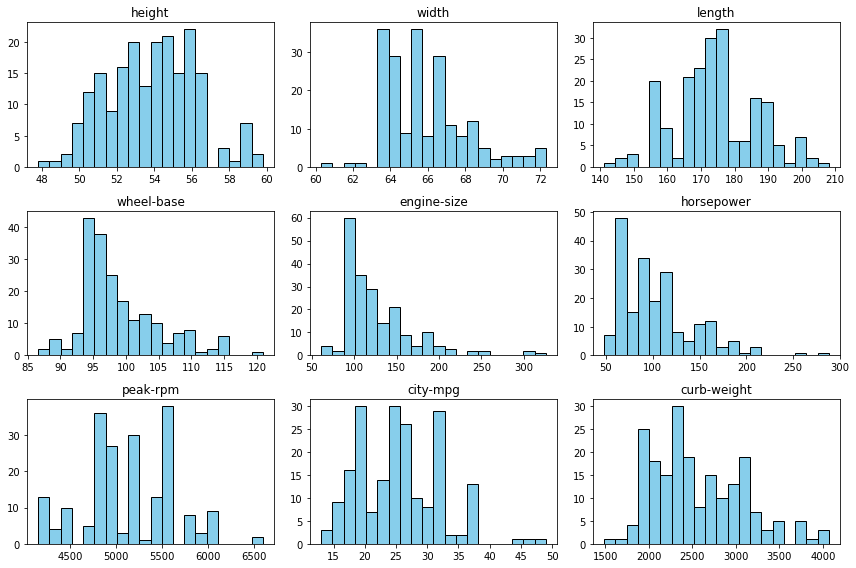

In [29]:
#Histograms

plt.figure(figsize=(12, 8))
for col in ['length', 'width', 'height', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg','curb-weight']:
    plt.subplot(3, 3, list(df_selected.columns).index(col) + 1)
    
    plt.hist(df_selected[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()



In [30]:
#To create box plot I need to change data types of columns horse power and peak-rpm from object to numeric data type
# Convert 'horsepower' and 'peak-rpm' columns to numeric
df_selected['horsepower'] = pd.to_numeric(df_selected['horsepower'], errors='coerce')
df_selected['peak-rpm'] = pd.to_numeric(df_selected['peak-rpm'],errors='coerce')

C:\Users\Pratibha\AppData\Local\Temp/ipykernel_12580/507650705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['horsepower'] = pd.to_numeric(df_selected['horsepower'], errors='coerce')
C:\Users\Pratibha\AppData\Local\Temp/ipykernel_12580/507650705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['peak-rpm'] = pd.to_numeric(df_selected['peak-rpm'],errors='coerce')


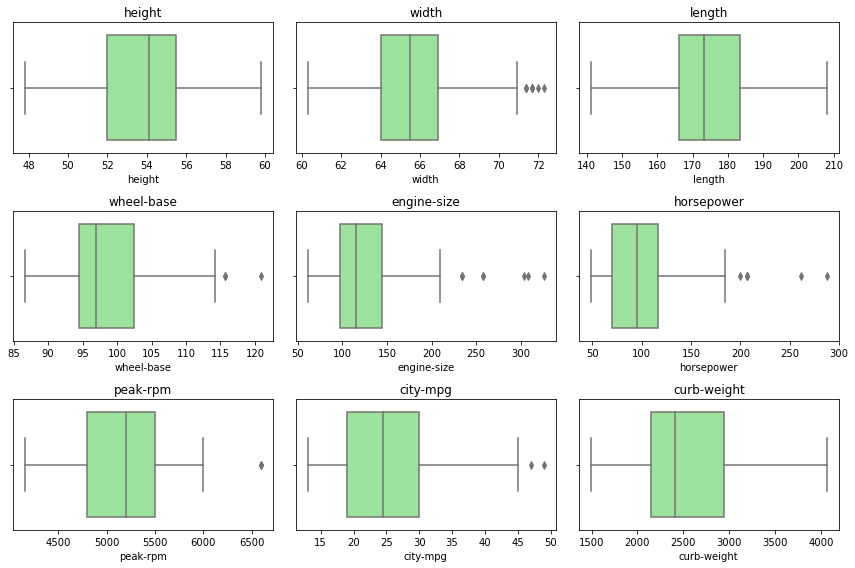

In [31]:
# Box Plots

plt.figure(figsize=(12, 8))
for col in ['length', 'width', 'height', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg','curb-weight']:
    plt.subplot(3, 3, list(df_selected.columns).index(col) + 1)
    sns.boxplot(x=df_selected[col],color = 'lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()



# Correlation Analysis: 


A correlation matrix and heatmap were generated to understand the relationships between variables.

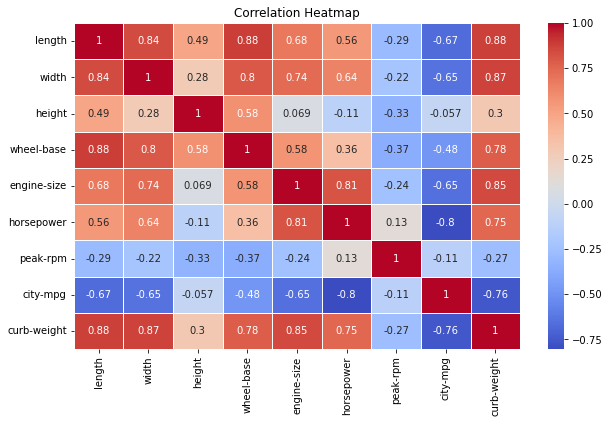

In [32]:
# Correlation Analysis
corr_matrix = df_selected[['length', 'width', 'height', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg','curb-weight']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

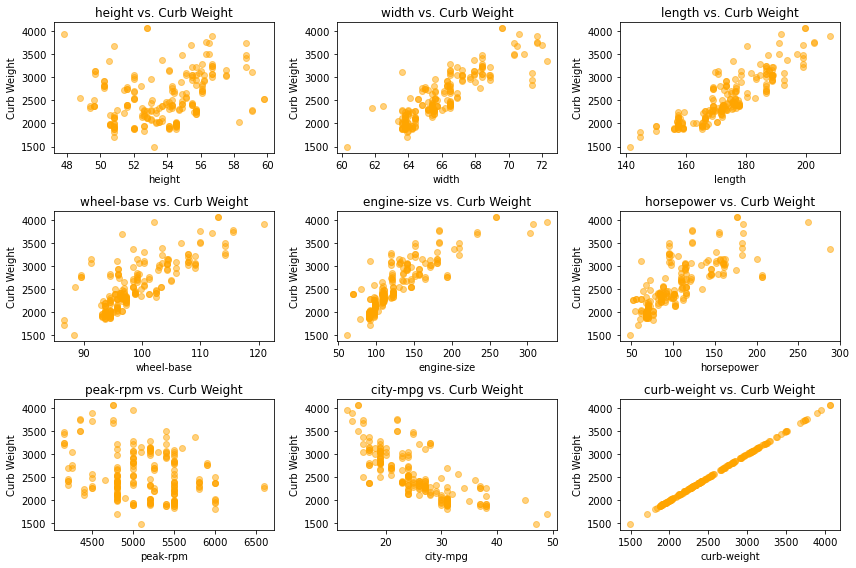

In [33]:
# Scatter Plots 
#Scatter Plots (with 'curb-weight' as response variable)
plt.figure(figsize=(12, 8))
for col in ['length', 'width', 'height', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg','curb-weight']:
    plt.subplot(3, 3, list(df_selected.columns).index(col) + 1)
    plt.scatter(df_selected[col], df_selected['curb-weight'], alpha=0.5, color='orange')
    plt.title(f'{col} vs. Curb Weight')
    plt.xlabel(col)
    plt.ylabel('Curb Weight')
plt.tight_layout()
plt.show()

# Preliminary Predictive Inferences

# Preliminary Predictive Inferences
Based on the correlation heatmap and scatter plots, we can make some inferences:
- 'engine-size' and 'horsepower' have a strong positive correlation with 'curb-weight.'
- 'city-mpg' has a strong negative correlation with 'curb-weight.'
- These variables may be potential predictors of 'curb-weight.'

# Regression Model Construction & Evaluation

On the basis of insight gain from EDA, I will use 'engine-size','horsepower' and 'city-mpg'as a predictiors in my linear regression model.I will perform cross-validation byusing scikit learn library

In [34]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Feature Selection

Three explanatory variables, namely 'engine-size,' 'horsepower,' and 'city-mpg,' were chosen as potential predictors of 'curb-weight' based on EDA findings.

In [35]:
X = df_selected[['engine-size', 'horsepower', 'city-mpg']]
y = df_selected['curb-weight']
#Number of folds for cross validation
K = 5

#Initialize array to store R2 score
model_1_r2scores = []
model_2_r2scores = []

#Initialize K-fold cross validation
kf = KFold(n_splits=K, shuffle= True ,random_state=42)

#Defining my model with different set of explanatory variable

model_1 = LinearRegression()
model_2 = LinearRegression()

# Performing K-fold cross-validation
for train_index, test_index in kf.split(X): 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit and evaluate Model 1
    model_1.fit(X_train, y_train)
    y_pred1 = model_1.predict(X_test)
    r2_1 = r2_score(y_test, y_pred1)
    model_1_r2scores.append(r2_1)
    
    # Fit and evaluate Model 2
    model_2.fit(X_train, y_train)
    y_pred2 = model_2.predict(X_test)
    r2_2 = r2_score(y_test, y_pred2)
    model_2_r2scores.append(r2_2)
    
# Calculating average R² scores for each model
avg_r2_model_1 = np.mean(model_1_r2scores)
avg_r2_model_2 = np.mean(model_2_r2scores)

# Select the preferred model based on average R² scores
preferred_model = model_1 if avg_r2_model_1 > avg_r2_model_2 else model_2

In [36]:
print(avg_r2_model_1)
print(avg_r2_model_2)

0.7864161393417557
0.7864161393417557


# Model Selection

The preferred model was chosen based on the average R² scores of both models. In this case, 'model_1' and 'model_2' had identical average R² scores of approximately 0.7864.

# Conclusions

In conclusion, the analysis led to the construction of linear regression models for predicting the curb weight of passenger vehicles. The selected models used 'engine-size,' 'horsepower,' and 'city-mpg' as predictors. These models performed similarly well, with an average R² score of approximately 0.7864. Further enhancements to the analysis could include feature engineering, hyperparameter tuning, residual analysis, and test set evaluation to improve model performance and assess generalization capabilities. Deployment of the model for real-world predictions may also be considered.

# Video Link

In [1]:
https://screenpal.com/watch/c0QY24VCJ4V

SyntaxError: invalid syntax (Temp/ipykernel_19420/2754148434.py, line 1)